# HARK KrusselSmith

Based on the most recent implemetation

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.ConsAggShockModel import (
    KrusellSmithType,
    KrusellSmithEconomy
)
from HARK.distribution import DiscreteDistribution
from scipy.stats import linregress
from copy import deepcopy


Now solving for the equilibrium of the Krusell-Smith (1998) model.  This might take a few minutes...
intercept=[-0.10207436687293436, -0.10767902704819221], slope=[1.0247319520414577, 1.0262160575876842], r-sq=[0.9992152491743708, 0.9995352000008921]
intercept=[-0.11224741844783132, -0.12433584692172084], slope=[1.0192011526727993, 1.0236231955551016], r-sq=[0.9991305070384109, 0.9995098435933963]
intercept=[-0.16177628954699422, -0.16589495974334023], slope=[1.0377402170065633, 1.0388181624041508], r-sq=[0.9993060667720641, 0.999592820657694]
intercept=[-0.1854078237344508, -0.18424328278857255], slope=[1.0465487062602246, 1.0454778598064025], r-sq=[0.9993730939807418, 0.9995082432840596]
intercept=[-0.1269671821432942, -0.12811040840458346], slope=[1.022423943000477, 1.0224927940509194], r-sq=[0.9999848312811576, 0.9999891201104739]
intercept=[-0.12403490290945958, -0.12540023604830175], slope=[1.0221770337339302, 1.0224791640621183], r-sq=[0.9999995492997705, 0.9999998092906319]
int

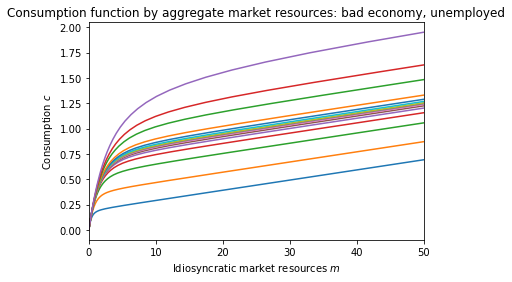

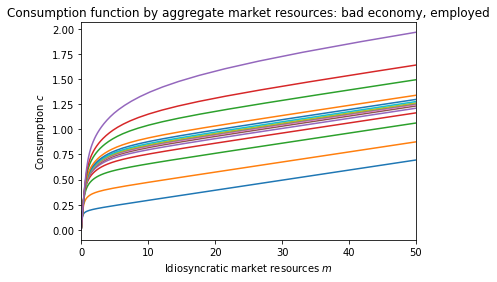

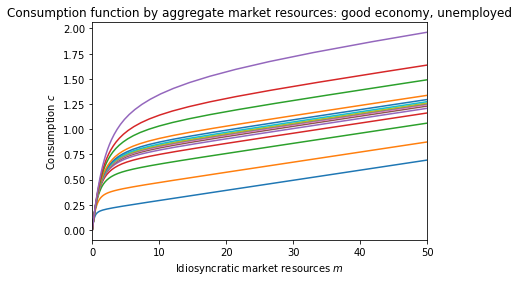

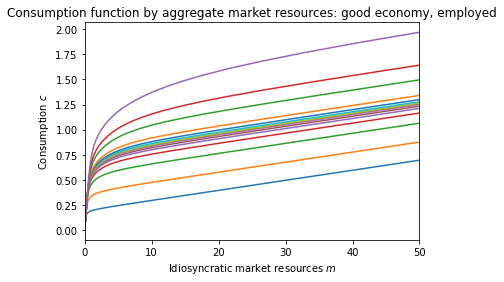


Equilibrium dynamics of aggregate capital:
Bad state:  log k' = 0.0837 + 0.9649 log k (r-sq = 0.9999982)
Good state: log k' = 0.0946 + 0.9626 log k (r-sq = 0.9999989)

Krusell & Smith's published results (p877):
Bad state:  log k' = 0.085 + 0.965 log k (r-sq = 0.999998)
Good state: log k' = 0.095 + 0.962 log k (r-sq = 0.999998)


In [2]:
# Make default KS agent type and economy
KSeconomy = KrusellSmithEconomy()
KStype = KrusellSmithType()
KStype.cycles = 0
KStype.getEconomyData(KSeconomy)
KSeconomy.agents = [KStype]
KSeconomy.makeMrkvHist()
    
# Solve the Krusell-Smith economy
t0 = time()
print("Now solving for the equilibrium of the Krusell-Smith (1998) model.  This might take a few minutes...")
KSeconomy.solve()
t1 = time()
print('Solving the Krusell-Smith model took ' + str(t1-t0) + ' seconds.')
    
state_names = ['bad economy, unemployed', 'bad economy, employed',
               'good economy, unemployed', 'good economy, employed']
    
# Plot the consumption function for each discrete state
for j in range(4):
    plt.xlabel(r'Idiosyncratic market resources $m$')
    plt.ylabel(r'Consumption $c$')
    plt.title('Consumption function by aggregate market resources: ' + state_names[j])
    plotFuncs(KStype.solution[0].cFunc[j].xInterpolators, 0., 50.)
        
# Extract history of aggregate capital and run a serial autoregression
mystr = lambda x : '{:.4f}'.format(x)
mystr2 = lambda x : '{:.7f}'.format(x)
K_hist = np.array(KSeconomy.history['Aprev'])[KSeconomy.T_discard:]
Mrkv_hist = KSeconomy.MrkvNow_hist[KSeconomy.T_discard:]
bad = Mrkv_hist[:-1] == 0
good = Mrkv_hist[:-1] == 1
logK_t = np.log(K_hist[:-1])
logK_tp1 = np.log(K_hist[1:])
results_bad = linregress(logK_t[bad], logK_tp1[bad])
results_good = linregress(logK_t[good], logK_tp1[good])
print('')
print('Equilibrium dynamics of aggregate capital:')
print("Bad state:  log k' = " + mystr(results_bad[1]) + ' + ' + mystr(results_bad[0]) + ' log k (r-sq = ' +  mystr2(results_bad[2]**2) + ')')
print("Good state: log k' = " + mystr(results_good[1]) + ' + ' + mystr(results_good[0]) + ' log k (r-sq = ' +  mystr2(results_good[2]**2) + ')')
print('')
print("Krusell & Smith's published results (p877):")
print("Bad state:  log k' = 0.085 + 0.965 log k (r-sq = 0.999998)")
print("Good state: log k' = 0.095 + 0.962 log k (r-sq = 0.999998)")
